In [2]:
import numpy as np
import pandas as pd

import unicodedata, re, string
import nltk

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
import os


In [3]:
df = pd.read_csv(r"\Users\rusal\Downloads\1282_2303_bundle_archive/labeledTrainData.tsv", sep="\t")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [5]:
df.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


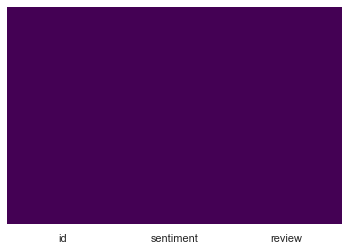

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [8]:
df = df.rename(columns = {'sentiment':'Rating'})

In [9]:
df.head()

,id,Rating,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


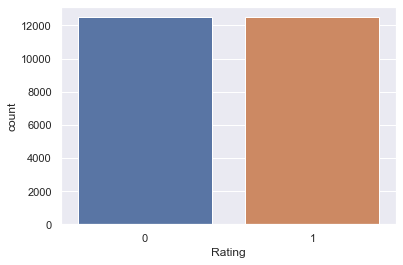

In [10]:
sns.countplot(x="Rating", data = df)

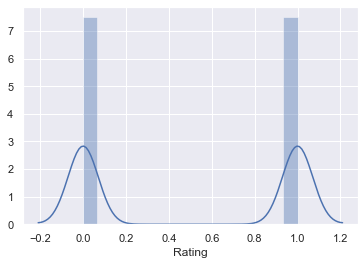

In [11]:
sns.distplot(df['Rating'])

In [12]:
print(df.shape)

(25000, 3)


In [13]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_numbers(words):
    """Remove all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        new_word = re.sub("\d+", "", word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
#    words = remove_stopwords(words)
    return words


In [14]:
df.head()

,id,Rating,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [15]:
# First step - tokenizing phrases
df['Words'] = df['review'].apply(nltk.word_tokenize)

# Second step - passing through prep functions
df['Words'] = df['Words'].apply(normalize) 
df['Words'].head()

0    [with, all, this, stuff, going, down, at, the,...
1    [the, classic, war, of, the, worlds, by, timot...
2    [the, film, starts, with, a, manager, nicholas...
3    [it, must, be, assumed, that, those, who, prai...
4    [superbly, trashy, and, wondrously, unpretenti...
Name: Words, dtype: object

In [67]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rusal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df

,id,Rating,review,Words
0,5814_8,1,With all this stuff going down at the moment w...,"[with, all, this, stuff, going, down, at, the,..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[the, classic, war, of, the, worlds, by, timot..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[the, film, starts, with, a, manager, nicholas..."
3,3630_4,0,It must be assumed that those who praised this...,"[it, must, be, assumed, that, those, who, prai..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, and, wondrously, unpretenti..."
...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,"[it, seems, like, more, consideration, has, go..."
24996,5064_1,0,I don't believe they made this film. Completel...,"[i, do, nt, believe, they, made, this, film, c..."
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...","[guy, is, a, loser, ca, nt, get, girls, needs,..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,"[this, minute, documentary, bunuel, made, in, ..."


In [17]:
# Third step - creating a list of unique words to be used as dictionary for encoding
word_set = set()
for l in df['Words']:
    for e in l:
        word_set.add(e)
        
word_to_int = {word: ii for ii, word in enumerate(word_set, 1)}

# Check if they are still the same lenght
print(len(word_set))
print(len(word_to_int))

93403
93403


In [18]:
# Now the dict to tokenize each phrase
df['Tokens'] = df['Words'].apply(lambda l: [word_to_int[word] for word in l])
df['Tokens'].head()

0    [85193, 22874, 34341, 66889, 36811, 64016, 421...
1    [37661, 82401, 66520, 1507, 37661, 44441, 7753...
2    [37661, 71474, 51118, 85193, 81682, 35430, 843...
3    [17404, 11829, 69646, 83297, 85534, 36937, 226...
4    [20540, 21349, 83828, 9330, 9168, 32330, 38356...
Name: Tokens, dtype: object

In [19]:
df

,id,Rating,review,Words,Tokens
0,5814_8,1,With all this stuff going down at the moment w...,"[with, all, this, stuff, going, down, at, the,...","[85193, 22874, 34341, 66889, 36811, 64016, 421..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[the, classic, war, of, the, worlds, by, timot...","[37661, 82401, 66520, 1507, 37661, 44441, 7753..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[the, film, starts, with, a, manager, nicholas...","[37661, 71474, 51118, 85193, 81682, 35430, 843..."
3,3630_4,0,It must be assumed that those who praised this...,"[it, must, be, assumed, that, those, who, prai...","[17404, 11829, 69646, 83297, 85534, 36937, 226..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, and, wondrously, unpretenti...","[20540, 21349, 83828, 9330, 9168, 32330, 38356..."
...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,"[it, seems, like, more, consideration, has, go...","[17404, 14840, 79399, 32799, 28390, 35252, 907..."
24996,5064_1,0,I don't believe they made this film. Completel...,"[i, do, nt, believe, they, made, this, film, c...","[37234, 14532, 11727, 26784, 90830, 55088, 343..."
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...","[guy, is, a, loser, ca, nt, get, girls, needs,...","[65736, 16723, 81682, 53527, 82770, 11727, 100..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,"[this, minute, documentary, bunuel, made, in, ...","[34341, 48767, 24070, 26319, 55088, 81667, 376..."


In [20]:
# Step four - get the len of longest phrase
max_len = df['Tokens'].str.len().max()
print(max_len)

2502


In [21]:
df

,id,Rating,review,Words,Tokens
0,5814_8,1,With all this stuff going down at the moment w...,"[with, all, this, stuff, going, down, at, the,...","[85193, 22874, 34341, 66889, 36811, 64016, 421..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[the, classic, war, of, the, worlds, by, timot...","[37661, 82401, 66520, 1507, 37661, 44441, 7753..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[the, film, starts, with, a, manager, nicholas...","[37661, 71474, 51118, 85193, 81682, 35430, 843..."
3,3630_4,0,It must be assumed that those who praised this...,"[it, must, be, assumed, that, those, who, prai...","[17404, 11829, 69646, 83297, 85534, 36937, 226..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, and, wondrously, unpretenti...","[20540, 21349, 83828, 9330, 9168, 32330, 38356..."
...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,"[it, seems, like, more, consideration, has, go...","[17404, 14840, 79399, 32799, 28390, 35252, 907..."
24996,5064_1,0,I don't believe they made this film. Completel...,"[i, do, nt, believe, they, made, this, film, c...","[37234, 14532, 11727, 26784, 90830, 55088, 343..."
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...","[guy, is, a, loser, ca, nt, get, girls, needs,...","[65736, 16723, 81682, 53527, 82770, 11727, 100..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,"[this, minute, documentary, bunuel, made, in, ...","[34341, 48767, 24070, 26319, 55088, 81667, 376..."


In [22]:
# Pad each phrase representation with zeroes, starting from the beginning of sequence
# Will use a combined list of phrases as np array for further work. 

all_tokens = np.array([t for t in df['Tokens']])
encoded_labels = np.array([l for l in df['Rating']])

# Create blank rows
features = np.zeros((len(all_tokens), max_len), dtype=int)
# for each phrase, add zeros at the end 
for i, row in enumerate(all_tokens):
    features[i, :len(row)] = row

#print first 3 values of the feature matrix 
print(features[:3])

[[85193 22874 34341 ...     0     0     0]
 [37661 82401 66520 ...     0     0     0]
 [37661 71474 51118 ...     0     0     0]]


In [23]:
df

,id,Rating,review,Words,Tokens
0,5814_8,1,With all this stuff going down at the moment w...,"[with, all, this, stuff, going, down, at, the,...","[85193, 22874, 34341, 66889, 36811, 64016, 421..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[the, classic, war, of, the, worlds, by, timot...","[37661, 82401, 66520, 1507, 37661, 44441, 7753..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[the, film, starts, with, a, manager, nicholas...","[37661, 71474, 51118, 85193, 81682, 35430, 843..."
3,3630_4,0,It must be assumed that those who praised this...,"[it, must, be, assumed, that, those, who, prai...","[17404, 11829, 69646, 83297, 85534, 36937, 226..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, and, wondrously, unpretenti...","[20540, 21349, 83828, 9330, 9168, 32330, 38356..."
...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,"[it, seems, like, more, consideration, has, go...","[17404, 14840, 79399, 32799, 28390, 35252, 907..."
24996,5064_1,0,I don't believe they made this film. Completel...,"[i, do, nt, believe, they, made, this, film, c...","[37234, 14532, 11727, 26784, 90830, 55088, 343..."
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...","[guy, is, a, loser, ca, nt, get, girls, needs,...","[65736, 16723, 81682, 53527, 82770, 11727, 100..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,"[this, minute, documentary, bunuel, made, in, ...","[34341, 48767, 24070, 26319, 55088, 81667, 376..."


In [24]:
df = df.sample(frac=1)

In [25]:
df

,id,Rating,review,Words,Tokens
11386,11797_8,1,Powers Booth is hypnotic as cult leader jim jo...,"[powers, booth, is, hypnotic, as, cult, leader...","[73286, 1158, 16723, 87114, 33412, 20009, 3854..."
16995,3150_10,1,"I haven't liked many TV shows post 1990, but T...","[i, have, nt, liked, many, tv, shows, post, bu...","[37234, 67596, 11727, 21914, 62788, 65025, 907..."
7834,2510_10,1,Moon Child is the story of two brothers and a ...,"[moon, child, is, the, story, of, two, brother...","[11834, 11522, 16723, 37661, 37888, 1507, 6723..."
10933,11776_9,1,Chuck Jones's 'Hare Conditioned' is a fast pac...,"[chuck, jones, s, hare, conditioned, is, a, fa...","[17293, 37179, 32330, 55890, 69976, 16723, 816..."
21401,10797_8,1,"Composed, elegant Carol (marvelously played by...","[composed, elegant, carol, marvelously, played...","[18608, 84742, 1142, 25581, 75998, 77531, 3766..."
...,...,...,...,...,...
19462,9114_10,1,Considering the lack of art with in African ci...,"[considering, the, lack, of, art, with, in, af...","[77306, 37661, 55616, 1507, 91851, 85193, 8166..."
3377,6227_2,0,Good performances can't save this terrible scr...,"[good, performances, ca, nt, save, this, terri...","[60321, 25564, 82770, 11727, 48769, 34341, 225..."
13931,9547_9,1,This movie is the first time movie experience ...,"[this, movie, is, the, first, time, movie, exp...","[34341, 43545, 16723, 37661, 12979, 60697, 435..."
1403,11287_3,0,This is a film that had a lot to live down to ...,"[this, is, a, film, that, had, a, lot, to, liv...","[34341, 16723, 81682, 71474, 85534, 82815, 816..."


In [26]:

all_tokens = np.array([t for t in df['Tokens']])
encoded_labels = np.array([l for l in df['Rating']])

In [27]:
# Create blank rows
features = np.zeros((len(all_tokens), max_len), dtype=int)
# for each phrase, add zeros at the end 
for i, row in enumerate(all_tokens):
    features[i, :len(row)] = row


In [28]:
features

array([[73286,  1158, 16723, ...,     0,     0,     0],
       [37234, 67596, 11727, ...,     0,     0,     0],
       [11834, 11522, 16723, ...,     0,     0,     0],
       ...,
       [34341, 43545, 16723, ...,     0,     0,     0],
       [34341, 16723, 81682, ...,     0,     0,     0],
       [34341, 43352, 39631, ...,     0,     0,     0]])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = features
y = encoded_labels
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [31]:
from sklearn.svm import SVC

In [32]:
model = SVC()

In [33]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
X_test

array([[37661, 25663, 60193, ...,     0,     0,     0],
       [15730, 34341, 81682, ...,     0,     0,     0],
       [88947, 13097, 16723, ...,     0,     0,     0],
       ...,
       [37234,  1706, 31521, ...,     0,     0,     0],
       [17404, 47927, 26108, ...,     0,     0,     0],
       [16667, 31836, 14010, ...,     0,     0,     0]])

In [35]:
predictions = model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(confusion_matrix(y_test,predictions))

[[2083 1636]
 [1975 1806]]


In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.51      0.56      0.54      3719
           1       0.52      0.48      0.50      3781

    accuracy                           0.52      7500
   macro avg       0.52      0.52      0.52      7500
weighted avg       0.52      0.52      0.52      7500

